# 30 - Statistical Power in Depth

**Statistical Power**: How likely you are to catch a real effect if it exists.

**Formula**: Power = 1 - β (where β = Type II error rate)

**Power increases with:**
- Larger sample sizes
- Stronger effects (bigger differences)
- Less noise/variability in data

**Why it matters**: Low power means you might miss real improvements, opportunities, or problems. High power means you can confidently detect effects when they exist.

## Simple Example: Fishing with Different Net Sizes

**The Story**: You're fishing in a lake with real fish swimming around.

- **Tiny Net** (small sample): Might miss the fish even though they're there
- **Medium Net** (medium sample): Catches some fish, misses others
- **Big Net** (large sample): Almost always catches fish when they're present

**Statistical Power = Probability your net catches fish when fish are actually there**

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62694/3652496561.py:127: UserWarning: Glyph 128031 (\N{FISH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62694/3652496561.py:127: UserWarning: Glyph 127907 (\N{FISHING POLE AND FISH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62694/3652496561.py:127: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128031 (\N{FISH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127907 (\N{FISHING POLE AND FISH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

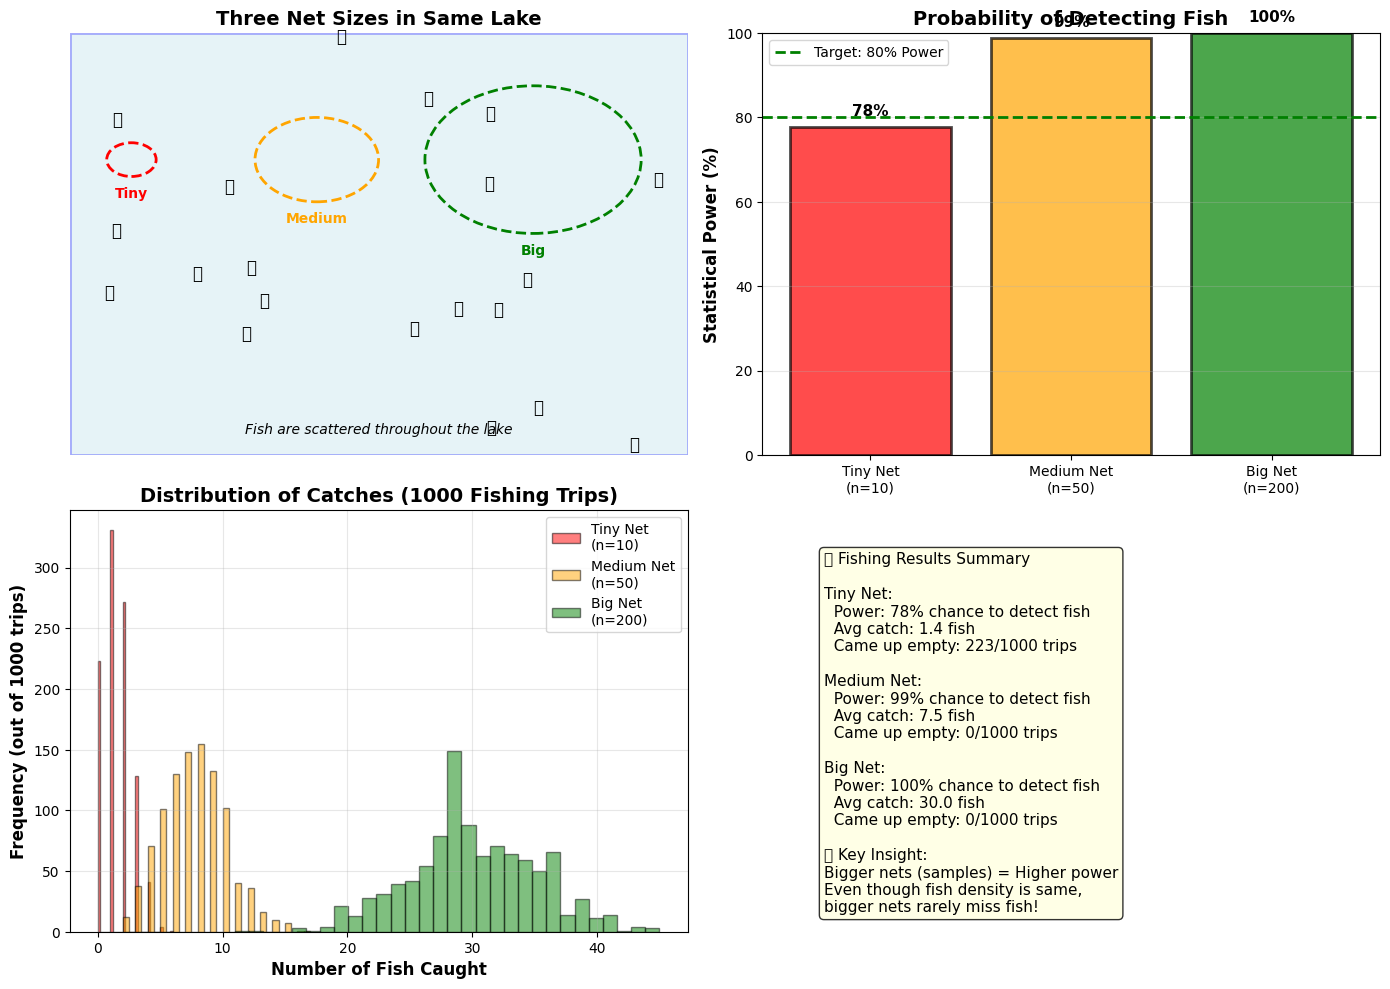


🎣 Statistical Power in Fishing:

Tiny Net (n=10):


KeyError: 'Tiny Net\\n(n=10)'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches

# Simulate fishing with different net sizes
np.random.seed(42)

# Lake parameters
lake_has_fish = True
fish_density = 0.15  # 15% of area has fish

# Three net sizes
net_sizes = {
    'Tiny Net\n(n=10)': 10,
    'Medium Net\n(n=50)': 50,
    'Big Net\n(n=200)': 200
}

# Run 1000 fishing trips with each net size
n_trips = 1000
results = {}

for net_name, net_size in net_sizes.items():
    catches = []
    for trip in range(n_trips):
        # Simulate catching fish
        catch = np.random.binomial(net_size, fish_density)
        catches.append(catch)
    
    # Calculate power: how often do we detect fish (catch > 0)?
    power = np.mean(np.array(catches) > net_size * 0.05)  # Detect if significantly different from empty
    results[net_name] = {'catches': catches, 'power': power}

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Net size visualization
ax1 = axes[0, 0]
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')

# Draw lake with fish
lake = mpatches.Rectangle((0, 0), 10, 10, linewidth=2, edgecolor='blue', facecolor='lightblue', alpha=0.3)
ax1.add_patch(lake)

# Draw some fish
for _ in range(20):
    x, y = np.random.uniform(0, 10, 2)
    ax1.text(x, y, '🐟', fontsize=12)

# Draw three different net sizes
nets = [
    {'x': 1, 'y': 7, 'size': 0.8, 'color': 'red', 'label': 'Tiny'},
    {'x': 4, 'y': 7, 'size': 2, 'color': 'orange', 'label': 'Medium'},
    {'x': 7.5, 'y': 7, 'size': 3.5, 'color': 'green', 'label': 'Big'}
]

for net in nets:
    circle = mpatches.Circle((net['x'], net['y']), net['size']/2, 
                            linewidth=2, edgecolor=net['color'], facecolor='none', linestyle='--')
    ax1.add_patch(circle)
    ax1.text(net['x'], net['y'] - net['size']/2 - 0.5, net['label'], 
            ha='center', fontsize=10, fontweight='bold', color=net['color'])

ax1.set_title('Three Net Sizes in Same Lake', fontsize=14, fontweight='bold')
ax1.text(5, 0.5, 'Fish are scattered throughout the lake', ha='center', fontsize=10, style='italic')

# 2. Power comparison bar chart
ax2 = axes[0, 1]
net_names = list(results.keys())
powers = [results[name]['power'] * 100 for name in net_names]
colors_bar = ['red', 'orange', 'green']

bars = ax2.bar(range(len(net_names)), powers, color=colors_bar, edgecolor='black', linewidth=2, alpha=0.7)
ax2.set_xticks(range(len(net_names)))
ax2.set_xticklabels(net_names, fontsize=10)
ax2.set_ylabel('Statistical Power (%)', fontsize=12, fontweight='bold')
ax2.set_title('Probability of Detecting Fish', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, label='Target: 80% Power')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add percentage labels
for bar, power in zip(bars, powers):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{power:.0f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3. Distribution of catches for each net size
ax3 = axes[1, 0]
for i, (net_name, data) in enumerate(results.items()):
    catches = data['catches']
    ax3.hist(catches, bins=30, alpha=0.5, label=net_name, color=colors_bar[i], edgecolor='black')

ax3.set_xlabel('Number of Fish Caught', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency (out of 1000 trips)', fontsize=12, fontweight='bold')
ax3.set_title('Distribution of Catches (1000 Fishing Trips)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

# 4. Summary comparison
ax4 = axes[1, 1]
ax4.axis('off')

summary_text = "🎣 Fishing Results Summary\n\n"
for i, (net_name, data) in enumerate(results.items()):
    catches = data['catches']
    power = data['power'] * 100
    avg_catch = np.mean(catches)
    zero_catches = np.sum(np.array(catches) == 0)
    
    summary_text += f"{net_name.split('(')[0].strip()}:\n"
    summary_text += f"  Power: {power:.0f}% chance to detect fish\n"
    summary_text += f"  Avg catch: {avg_catch:.1f} fish\n"
    summary_text += f"  Came up empty: {zero_catches}/1000 trips\n\n"

summary_text += "💡 Key Insight:\n"
summary_text += "Bigger nets (samples) = Higher power\n"
summary_text += "Even though fish density is same,\n"
summary_text += "bigger nets rarely miss fish!"

ax4.text(0.1, 0.9, summary_text, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🎣 Statistical Power in Fishing:\n")
print("Tiny Net (n=10):")
print(f"   → Power: {results['Tiny Net\\n(n=10)']['power']*100:.1f}%")
print("   → Often misses fish even though they're there!\n")

print("Medium Net (n=50):")
print(f"   → Power: {results['Medium Net\\n(n=50)']['power']*100:.1f}%")
print("   → Catches fish most of the time\n")

print("Big Net (n=200):")
print(f"   → Power: {results['Big Net\\n(n=200)']['power']*100:.1f}%")
print("   → Almost always catches fish when they're there!\n")

print("💡 The Lesson:")
print("   Same lake (same true effect)")
print("   Bigger net (larger sample) = Higher power to detect it")

## Real-World Example: A/B Test Sample Size Impact

**Business Context**: Testing a new website design that truly increases conversion by 2%.

- **Current conversion rate**: 10%
- **New design**: 12% (a real 2 percentage point improvement)
- **Question**: How many users do we need to detect this improvement?

**Small sample (50 users)**: Low power - might miss the real improvement  
**Large sample (5,000 users)**: High power - almost always finds the true winner

In [ ]:
# Simulate A/B tests with different sample sizes
np.random.seed(42)

# True conversion rates
control_rate = 0.10  # 10% baseline
treatment_rate = 0.12  # 12% with new design (2pp improvement)

# Different sample sizes to test
sample_sizes = [50, 100, 200, 500, 1000, 2000, 5000]

# Run 1000 simulated A/B tests for each sample size
n_simulations = 1000
alpha = 0.05  # Significance level

power_results = []

for n in sample_sizes:
    significant_results = 0
    
    for sim in range(n_simulations):
        # Simulate A/B test
        control_conversions = np.random.binomial(n, control_rate)
        treatment_conversions = np.random.binomial(n, treatment_rate)
        
        control_prop = control_conversions / n
        treatment_prop = treatment_conversions / n
        
        # Two-proportion z-test
        pooled_prop = (control_conversions + treatment_conversions) / (2 * n)
        se = np.sqrt(2 * pooled_prop * (1 - pooled_prop) / n)
        
        if se > 0:
            z_stat = (treatment_prop - control_prop) / se
            p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
            
            if p_value < alpha:
                significant_results += 1
    
    power = significant_results / n_simulations
    power_results.append(power)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Power curve
ax1 = axes[0, 0]
ax1.plot(sample_sizes, [p * 100 for p in power_results], 'b-o', linewidth=3, markersize=8)
ax1.axhline(y=80, color='green', linestyle='--', linewidth=2, label='Target: 80% Power')
ax1.axhline(y=50, color='orange', linestyle='--', linewidth=2, label='Coin Flip: 50%')
ax1.set_xlabel('Sample Size (Users per Group)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Statistical Power (%)', fontsize=12, fontweight='bold')
ax1.set_title('Power to Detect 2pp Improvement', fontsize=14, fontweight='bold')
ax1.set_xscale('log')
ax1.grid(alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_ylim(0, 100)

# Add annotations
ax1.annotate(f'{power_results[0]*100:.0f}%', xy=(sample_sizes[0], power_results[0]*100),
            xytext=(sample_sizes[0]*1.5, power_results[0]*100-15),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, fontweight='bold', color='red')
ax1.text(sample_sizes[0]*1.5, power_results[0]*100-20, 'Too low!', fontsize=9, color='red')

ax1.annotate(f'{power_results[-1]*100:.0f}%', xy=(sample_sizes[-1], power_results[-1]*100),
            xytext=(sample_sizes[-1]*0.6, power_results[-1]*100-10),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, fontweight='bold', color='green')
ax1.text(sample_sizes[-1]*0.5, power_results[-1]*100-15, 'Great!', fontsize=9, color='green')

# 2. Comparison: Small vs Large sample
ax2 = axes[0, 1]
comparison_sizes = [50, 5000]
comparison_powers = [power_results[0] * 100, power_results[-1] * 100]
comparison_labels = ['Small Sample\n(n=50)', 'Large Sample\n(n=5,000)']
colors_comp = ['red', 'green']

bars = ax2.bar(range(len(comparison_labels)), comparison_powers, 
              color=colors_comp, edgecolor='black', linewidth=2, alpha=0.7)
ax2.set_xticks(range(len(comparison_labels)))
ax2.set_xticklabels(comparison_labels, fontsize=11)
ax2.set_ylabel('Detection Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Small vs Large Sample Power', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax2.grid(axis='y', alpha=0.3)

# Add percentage labels
for bar, power in zip(bars, comparison_powers):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{power:.0f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

# 3. Simulation results for small sample
ax3 = axes[1, 0]
ax3.axis('off')

n_small = 50
detected = int(power_results[0] * 100)
missed = 100 - detected

small_text = f"📊 Small Sample (n={n_small})\n\n"
small_text += f"True improvement: 10% → 12%\n\n"
small_text += f"Out of 100 tests:\n"
small_text += f"  ✓ Detected improvement: {detected} times\n"
small_text += f"  ✗ Missed improvement: {missed} times\n\n"
small_text += f"Power: {power_results[0]*100:.0f}%\n\n"
small_text += "⚠️ Problem:\n"
small_text += "Even though new design is truly better,\n"
small_text += f"you'll miss it {missed}% of the time!\n\n"
small_text += "Risk: Abandon a winning design"

ax3.text(0.1, 0.9, small_text, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.8))

# 4. Simulation results for large sample
ax4 = axes[1, 1]
ax4.axis('off')

n_large = 5000
detected_large = int(power_results[-1] * 100)
missed_large = 100 - detected_large

large_text = f"📊 Large Sample (n={n_large})\n\n"
large_text += f"True improvement: 10% → 12%\n\n"
large_text += f"Out of 100 tests:\n"
large_text += f"  ✓ Detected improvement: {detected_large} times\n"
large_text += f"  ✗ Missed improvement: {missed_large} times\n\n"
large_text += f"Power: {power_results[-1]*100:.0f}%\n\n"
large_text += "✓ Success:\n"
large_text += "When new design is truly better,\n"
large_text += f"you'll detect it {detected_large}% of the time!\n\n"
large_text += "Outcome: Confidently find winners"

ax4.text(0.1, 0.9, large_text, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#ccffcc', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🎯 A/B Test Power Analysis:\n")
print("True Effect: 10% → 12% conversion (2pp improvement)\n")

print("Sample Size | Power | Interpretation")
print("-" * 50)
for size, power in zip(sample_sizes, power_results):
    interpretation = "❌ Too low" if power < 0.5 else "⚠️ Risky" if power < 0.8 else "✓ Good"
    print(f"n = {size:5d}  | {power*100:5.1f}% | {interpretation}")

print("\n💡 Business Impact:\n")
print("Small sample (n=50):")
print(f"   → Only {power_results[0]*100:.0f}% chance to detect real winner")
print("   → Might abandon winning design!\n")

print("Large sample (n=5,000):")
print(f"   → {power_results[-1]*100:.0f}% chance to detect real winner")
print("   → Almost always finds true improvement!\n")

print("⚖️ The Trade-off:")
print("   → Larger samples cost more time and money")
print("   → But low power risks missing real opportunities")
print("   → Target: 80% power is industry standard")

## Key Takeaways: Statistical Power

### What is Statistical Power?
**Power = Probability of detecting a real effect when it exists**
- Power = 1 - β (where β = Type II error rate)
- High power = Low chance of missing real effects
- Target: Usually 80% or higher

### Three Ways to Increase Power

| Method | How It Works | Example |
|--------|--------------|----------|
| **Larger Sample** | More data = clearer signal | 5,000 users instead of 50 |
| **Stronger Effect** | Bigger differences easier to detect | 10% improvement easier than 1% |
| **Less Noise** | Reduce variability in measurements | Better measurement tools |

### The Fishing Net Analogy
- **Tiny net** (small sample) = Low power = Might miss fish
- **Big net** (large sample) = High power = Almost always catches fish
- Same lake (same true effect), different detection rates!

### Real-World Consequences

**Low Power Problems:**
- Miss real opportunities (abandon winning products)
- Waste resources on inconclusive tests
- False negatives hurt business

**High Power Benefits:**
- Confidently detect real improvements
- Make data-driven decisions
- Avoid missing opportunities

### Sample Size Planning

**Before running any test, ask:**
1. What effect size do I need to detect?
2. How much power do I want? (typically 80%)
3. How many samples do I need?

**A/B Test Example (10% → 12% conversion):**
- n = 50: Only ~20% power → Don't bother!
- n = 500: About 50% power → Coin flip
- n = 2,000: About 80% power → Good!
- n = 5,000: About 95% power → Excellent!

### The Bottom Line

**Statistical power tells you:**
- "If there's a real effect, will I find it?"
- Low power = Wasting time (won't detect even if real)
- High power = Good investment (will find real effects)

**Always plan for adequate power BEFORE collecting data!**

### Common Mistakes

❌ Running underpowered studies and concluding "no effect"  
❌ Adding more data after seeing results (p-hacking)  
❌ Assuming non-significant = proof of no effect  

✓ Calculate required sample size upfront  
✓ Design studies with 80%+ power  
✓ Understand: "No significant result" ≠ "No effect"  